---
title: "Fourier-based derivatives"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

This tutorial is based on @pelliccia2019fourier.

nice trick: <https://math.stackexchange.com/questions/430858/fourier-transform-of-derivative>


When we learned about Fourier transforms, we saw the following equation:

$$
f(t) = \int_{-\infty}^{\infty} F(k) e^{2\pi i k t}dk.
$$.

What happens if we take the time derivative of the expression above?

$$
\begin{split}
\frac{d}{dt}f(t) &= \frac{d}{dt}\int_{-\infty}^{\infty} F(k) e^{2\pi i k t}dk \\
                 &= \int_{-\infty}^{\infty} F(k) \frac{d}{dt} e^{2\pi i k t}dk \\
                 &= \int_{-\infty}^{\infty} F(k) (2\pi i k) e^{2\pi i k t}dk
\end{split}
$$

We found something interesting! The derivative of $f(t)$ can be calculated by taking the Inverse Fourier Transform of $(2\pi i k)F(k)$.

In [10]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib widget

In [4]:
#| code-summary: "load data and plot"
filename = "dead_sea_1d.csv"
df = pd.read_csv(filename)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [18]:
fft = scipy.fft.fft(df['level'].values)
N = len(df['level'])
xi = scipy.fft.fftfreq(N)
cutoff_xi = 2.0 * np.pi / 30
mask = np.where(np.abs(xi) > cutoff_xi)
fft[mask] = 0.0
derivative = scipy.fft.ifft(2.0*np.pi*1j*xi*fft).real


In [14]:
derivative

array([ 27.21281471, -12.04981674,   7.58155427, ...,   7.57915866,
       -12.05269903,  27.21112258])

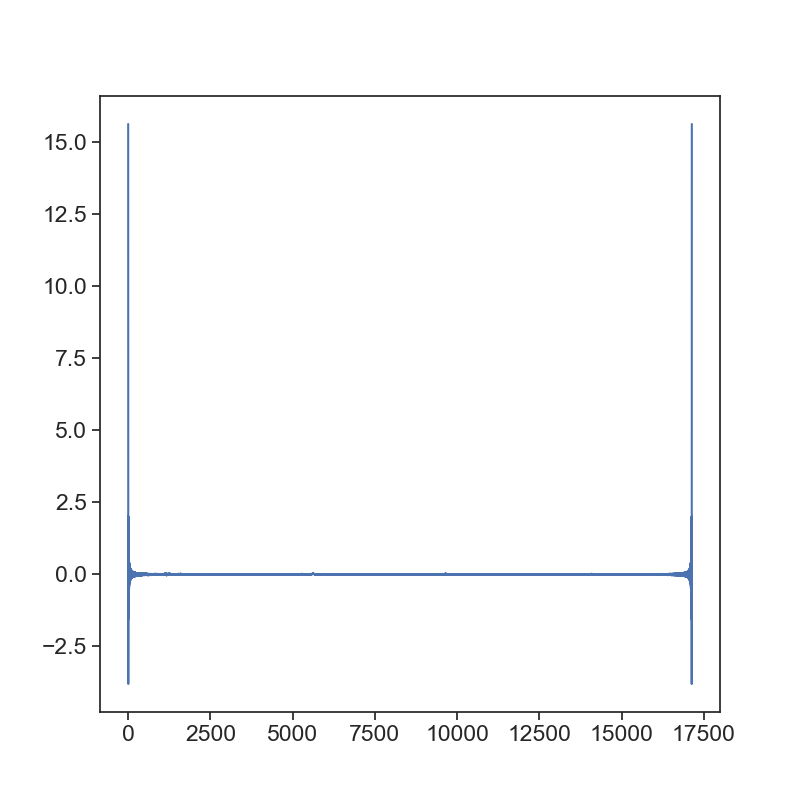

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(derivative)